In [89]:
import copy, random
import numpy as np
from deap import tools

In [90]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as a3
from matplotlib.path import Path
import matplotlib.patches as patches

In [109]:
class individual(list):
    def __init__(self, data):
        list.__init__(self, data)
        
        self.level = sum(self)
        self.value = data

In [18]:
class test():
    def __init__(self, a_list):
        self.values = a_list
        self.Fv_values = [0, 0, 0]

    def set_Fv(self, individual):
        self.Fv_values = individual.value

In [16]:
class Mean_vector:
    # 对m维空间，目标方向个数H
    def __init__(self, H=12, m=3, path='out.csv'):
        self.H = H
        self.m = m
        self.path = path
        self.stepsize = 1 / H

    def perm(self, sequence):
        # ！！！ 序列全排列，且无重复
        l = sequence
        if (len(l) <= 1):
            return [l]
        r = []
        for i in range(len(l)):
            if i != 0 and sequence[i - 1] == sequence[i]:
                continue
            else:
                s = l[:i] + l[i + 1:]
                p = self.perm(s)
                for x in p:
                    r.append(l[i:i + 1] + x)
        return r

    def get_mean_vectors(self):
        H = self.H
        m = self.m
        sequence = []
        for ii in range(H):
            sequence.append(0)
        for jj in range(m - 1):
            sequence.append(1)
        ws = []

        pe_seq = self.perm(sequence)
        for sq in pe_seq:
            s = -1
            weight = []
            for i in range(len(sq)):
                if sq[i] == 1:
                    w = i - s
                    w = (w - 1) / H
                    s = i
                    weight.append(w)
            nw = H + m - 1 - s
            nw = (nw - 1) / H
            weight.append(nw)
            if weight not in ws:
                ws.append(weight)
        return ws

    def save_mv_to_file(self, mv):
        f = np.array(mv, dtype=np.float64)
        np.savetxt(fname=self.path, X=f)

    def generate(self):
        m_v = self.get_mean_vectors()
        self.save_mv_to_file(m_v)

In [18]:
ccc = Mean_vector()
ccc.generate()

In [16]:
classCount = {"c": 1, "b": 4, "d": 2, "e": 6}
classCount.get

<function dict.get(key, default=None, /)>

In [4]:
def is_dominated(individual1, individual2):
    if individual1.value[0] >= individual2[0] and individual1.value[
            1] >= individual2[1] and individual1.value[2] >= individual2[2]:
        return True
    else:
        return False

In [17]:
def tchebychef(z, vector, individual):
    all_result = []
    for i in range(len(vector)):
        all_result.append(vector[i] * abs(individual.value[i] - z[i]))
        all_result.sort(reverse=True)
    return all_result[0]

In [37]:
def update_z(z,individual):
    for i in range(len(z)):
        if z[i]>individual[i]:
            z[i]=individual[i]
    return z

In [85]:
def MOEAD_ARCHIVE(vectors,individuals,z=[0,0,0]):
    expected_pop_index=[]
    expected_pop = []
    for i in range(len(vectors)):
        pop_and_tchebychef_of_vectori = {}
        for j in range(len(individuals)):
            pop_and_tchebychef_of_vectori[j] = tchebychef(z, vectors[i], individuals[j]) 
            #print(vectors[i], individuals[j],pop_and_tchebychef_of_vectori[j])
        expected_pop_index.append(min(pop_and_tchebychef_of_vectori,key=pop_and_tchebychef_of_vectori.get))
    expected_pop = [individuals[x] for x in expected_pop_index]
    return expected_pop
    

In [93]:
inds = np.loadtxt('3D-triangle.txt')
individuals = []
vectors = np.loadtxt('out.csv')
for ind in inds:
    individuals.append(individual(ind))
expected_pop = MOEAD_ARCHIVE(vectors,individuals,z=[0,0,0])

91


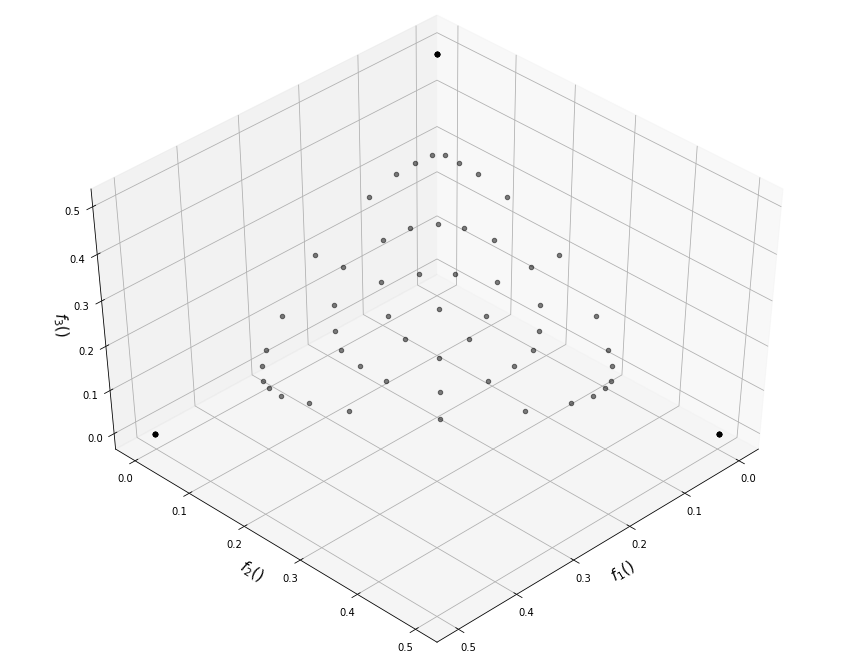

In [94]:
#Visualization of final pop of tri
fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(111, projection='3d')

for ind in expected_pop:
    ax.scatter(ind[0],ind[1],ind[2],c="black",alpha=0.5)
print(len(expected_pop))

# final figure details   
ax.set_xlabel('$f_1()$', fontsize=15)
ax.set_ylabel('$f_2()$', fontsize=15)
ax.set_zlabel('$f_3()$', fontsize=15)
ax.view_init(elev=45, azim=45)
plt.autoscale(tight=True)

In [86]:
inds = np.loadtxt('3D-circle.txt')
individuals = []
vectors = np.loadtxt('out.csv')
for ind in inds:
    individuals.append(individual(ind))
expected_pop = MOEAD_ARCHIVE(vectors,individuals,z=[0,0,0])

91


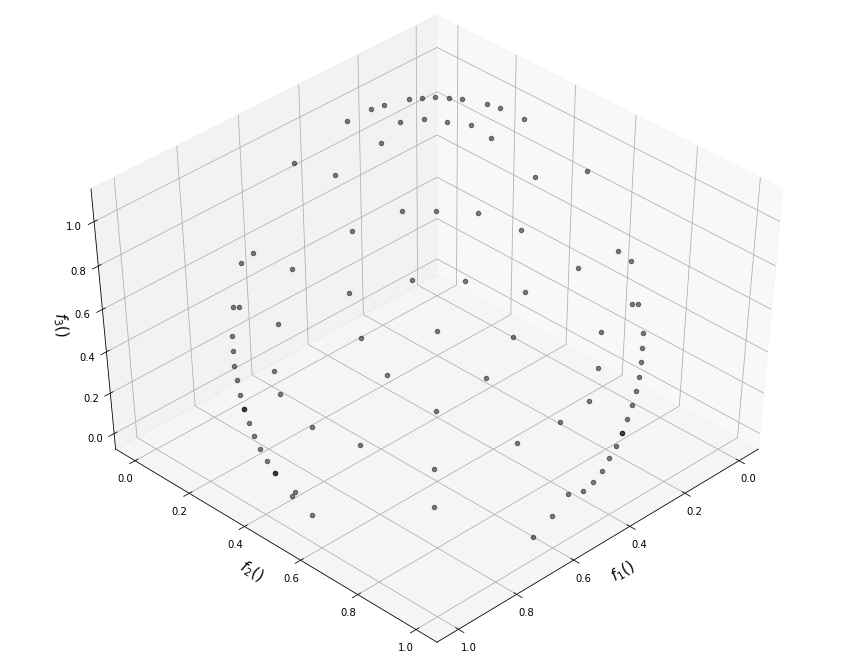

In [92]:
#Visualization of final pop of cir
fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(111, projection='3d')

for ind in expected_pop:
    ax.scatter(ind[0],ind[1],ind[2],c="black",alpha=0.5)
print(len(expected_pop))

# final figure details   
ax.set_xlabel('$f_1()$', fontsize=15)
ax.set_ylabel('$f_2()$', fontsize=15)
ax.set_zlabel('$f_3()$', fontsize=15)
ax.view_init(elev=45, azim=45)
plt.autoscale(tight=True)

In [95]:
inds = np.loadtxt('3D-quadrilateral.txt')
individuals = []
vectors = np.loadtxt('out.csv')
for ind in inds:
    individuals.append(individual(ind))
expected_pop = MOEAD_ARCHIVE(vectors,individuals,z=[0,0,0])

91


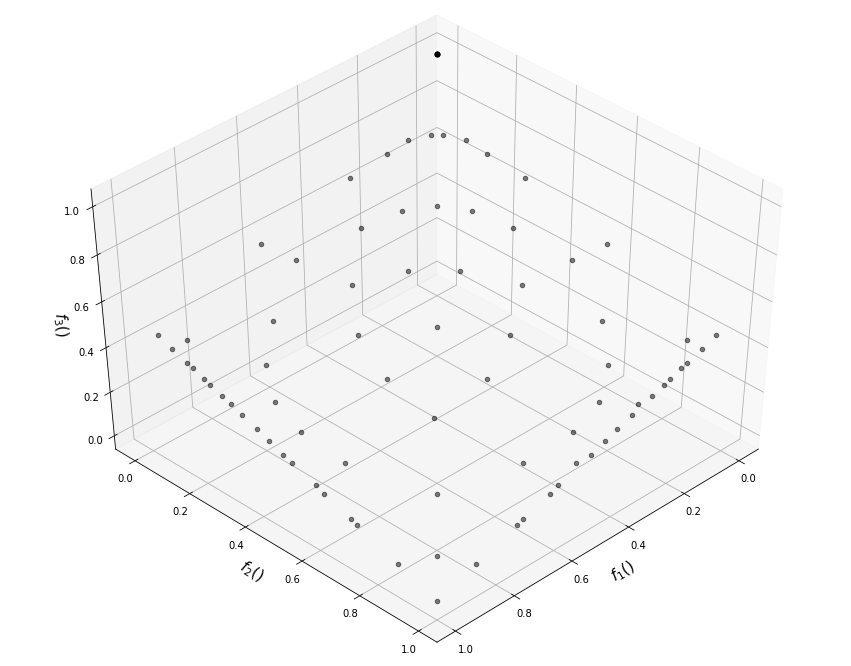

In [96]:
#Visualization of final pop of quadrilateral
fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(111, projection='3d')

for ind in expected_pop:
    ax.scatter(ind[0],ind[1],ind[2],c="black",alpha=0.5)
print(len(expected_pop))

# final figure details   
ax.set_xlabel('$f_1()$', fontsize=15)
ax.set_ylabel('$f_2()$', fontsize=15)
ax.set_zlabel('$f_3()$', fontsize=15)
ax.view_init(elev=45, azim=45)
plt.autoscale(tight=True)

In [98]:
inds = np.loadtxt('3D-lines.txt')
individuals = []
vectors = np.loadtxt('out.csv')
for ind in inds:
    individuals.append(individual(ind))
expected_pop = MOEAD_ARCHIVE(vectors,individuals,z=[0,0,0])

91


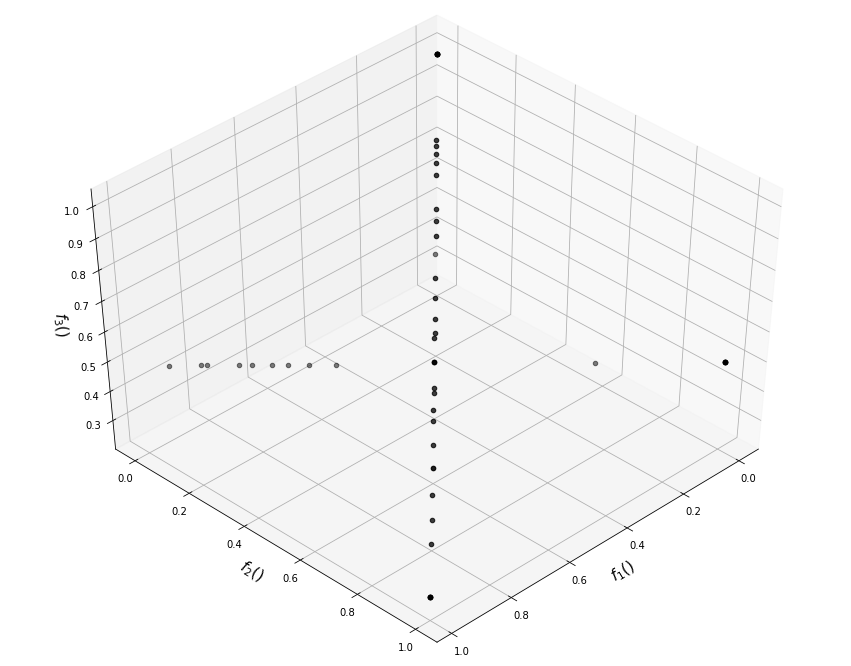

In [99]:
#Visualization of final pop of quadrilateral
fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(111, projection='3d')

for ind in expected_pop:
    ax.scatter(ind[0],ind[1],ind[2],c="black",alpha=0.5)
print(len(expected_pop))

# final figure details   
ax.set_xlabel('$f_1()$', fontsize=15)
ax.set_ylabel('$f_2()$', fontsize=15)
ax.set_zlabel('$f_3()$', fontsize=15)
ax.view_init(elev=45, azim=45)
plt.autoscale(tight=True)

In [100]:
inds = np.loadtxt('3D-star.txt')
individuals = []
vectors = np.loadtxt('out.csv')
for ind in inds:
    individuals.append(individual(ind))
expected_pop = MOEAD_ARCHIVE(vectors,individuals,z=[0,0,0])

91


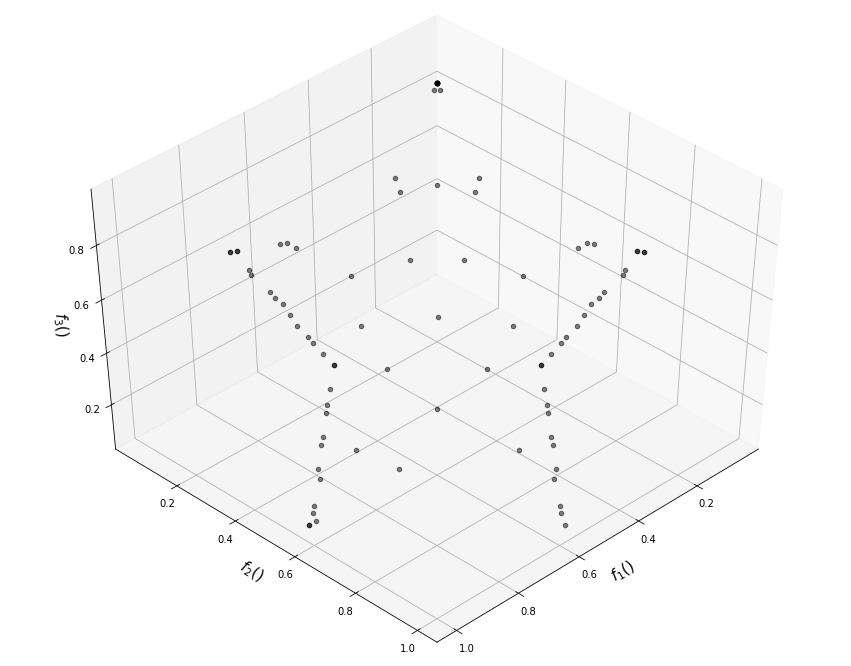

In [101]:
#Visualization of final pop of tar
fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(111, projection='3d')

for ind in expected_pop:
    ax.scatter(ind[0],ind[1],ind[2],c="black",alpha=0.5)
print(len(expected_pop))

# final figure details   
ax.set_xlabel('$f_1()$', fontsize=15)
ax.set_ylabel('$f_2()$', fontsize=15)
ax.set_zlabel('$f_3()$', fontsize=15)
ax.view_init(elev=45, azim=45)
plt.autoscale(tight=True)

In [102]:
inds = np.loadtxt('3D-combination.txt')
individuals = []
vectors = np.loadtxt('out.csv')
for ind in inds:
    individuals.append(individual(ind))
expected_pop = MOEAD_ARCHIVE(vectors,individuals,z=[0,0,0])

91


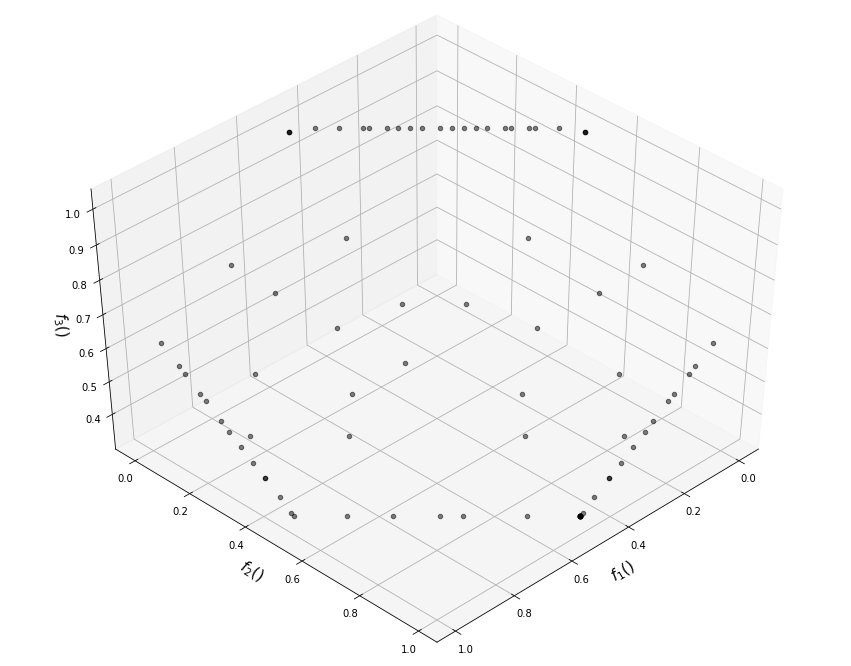

In [103]:
#Visualization of final pop of combination
fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(111, projection='3d')

for ind in expected_pop:
    ax.scatter(ind[0],ind[1],ind[2],c="black",alpha=0.5)
print(len(expected_pop))

# final figure details   
ax.set_xlabel('$f_1()$', fontsize=15)
ax.set_ylabel('$f_2()$', fontsize=15)
ax.set_zlabel('$f_3()$', fontsize=15)
ax.view_init(elev=45, azim=45)
plt.autoscale(tight=True)

In [112]:
inds = np.loadtxt('3D-star.txt')
individuals = []
vectors = np.loadtxt('out.csv')
for ind in inds:
    individuals.append(individual(ind))

In [114]:
sorted(individuals,key = lambda ind:ind[0])

[[0.054496737905815995, 0.7269952498697733, 0.6123386748162738],
 [0.06331770249528085, 0.7225007439223518, 0.6094543690549116],
 [0.06442579675308598, 0.7136900565632818, 0.6145894311224215],
 [0.07109701976378097, 0.7267830689286392, 0.6014132742050532],
 [0.0721386670847457, 0.7180062379749301, 0.6065700632935495],
 [0.07305016597737488, 0.7094589934433287, 0.6116605603861975],
 [0.07435485560035596, 0.7003848632567902, 0.6168401874285693],
 [0.07958929877245785, 0.7222927641638521, 0.5987452913757932],
 [0.08095963167421055, 0.7135117320275086, 0.6036857575321872],
 [0.08167453520166379, 0.7052279303233757, 0.6087316896499736],
 [0.0827826294594689, 0.6964172429643057, 0.6138667517174835],
 [0.08428391444762594, 0.6870796699502986, 0.619090943734717],
 [0.08769730162174583, 0.7265708879875051, 0.5904878735938327],
 [0.08808157778113473, 0.717802459399065, 0.5960773085465335],
 [0.08978059626367546, 0.7090172260800871, 0.6008014517708249],
 [0.09029890442595269, 0.7009968672034227, 